In [84]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split

In [85]:
data = pd.read_csv('C:/Users/MILAB/Desktop/자료/2022년 2학기/데이터마이닝/과제2/kyungsang_univ_2.csv', encoding='cp949')
data.head() 

,Unnamed: 0,측정일시,monthx,monthy,dayx,dayy,hourx,houry,기온(°C),강수량(mm),...,일조(hr),지면온도(°C),SO2,CO,O3,NO2,PM10,PM25,발전량,발전률
0,0,2017010101,0.5,0.866025,0.201299,0.97953,0.258819,0.965926,-2.4,0.0,...,0.0,-1.3,0.002,0.8,0.010,0.024,60,26,0.0,0.0
1,1,2017010102,0.5,0.866025,0.201299,0.97953,0.500000,0.866025,-3.0,0.0,...,0.0,-1.5,0.003,0.8,0.008,0.027,51,32,0.0,0.0
2,2,2017010103,0.5,0.866025,0.201299,0.97953,0.707107,0.707107,-3.1,0.0,...,0.0,-1.7,0.002,0.7,0.011,0.021,53,29,0.0,0.0
3,3,2017010104,0.5,0.866025,0.201299,0.97953,0.866025,0.500000,-3.5,0.0,...,0.0,-1.8,0.002,0.7,0.008,0.020,46,22,0.0,0.0
4,4,2017010105,0.5,0.866025,0.201299,0.97953,0.965926,0.258819,-3.6,0.0,...,0.0,-1.9,0.006,0.8,0.007,0.023,45,33,0.0,0.0


In [86]:
# data.info()
# 17520:26280
# 26280:
X_train = data.iloc[17520:26280, 2:22]
X_train = X_train.reset_index(drop=True)
X_train.head()

,monthx,monthy,dayx,dayy,hourx,houry,기온(°C),강수량(mm),풍속(m__s),습도(%),증기압(hPa),현지기압(hPa),일조(hr),지면온도(°C),SO2,CO,O3,NO2,PM10,PM25
0,0.5,0.866025,0.201299,0.97953,0.258819,0.965926,-5.7,0.0,0.3,49,2.0,1029.8,0.0,-6.3,0.005,0.6,0.017,0.025,35,15
1,0.5,0.866025,0.201299,0.97953,0.500000,0.866025,-5.9,0.0,0.6,49,1.9,1029.4,0.0,-7.0,0.006,0.6,0.018,0.024,27,12
2,0.5,0.866025,0.201299,0.97953,0.707107,0.707107,-6.5,0.0,0.5,50,1.9,1029.6,0.0,-7.4,0.006,0.6,0.020,0.022,32,13
3,0.5,0.866025,0.201299,0.97953,0.866025,0.500000,-7.2,0.0,0.1,57,2.0,1029.7,0.0,-7.7,0.004,0.5,0.030,0.014,27,12
4,0.5,0.866025,0.201299,0.97953,0.965926,0.258819,-7.4,0.0,0.2,58,2.0,1029.0,0.0,-7.8,0.004,0.5,0.031,0.012,27,12


In [87]:
y_train = data.iloc[17520:26280, 22]
y_train = y_train.reset_index(drop=True)
y_train.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 발전량, dtype: float64

In [88]:
X_test = data.iloc[26280:, 2:22]
X_test = X_test.reset_index(drop=True)
X_test.head()

,monthx,monthy,dayx,dayy,hourx,houry,기온(°C),강수량(mm),풍속(m__s),습도(%),증기압(hPa),현지기압(hPa),일조(hr),지면온도(°C),SO2,CO,O3,NO2,PM10,PM25
0,0.5,0.866025,0.201299,0.97953,0.258819,0.965926,-6.3,0.0,0.1,55,2.1,1028.5,0.0,-3.3,0.001,0.4,0.027,0.003,11,1
1,0.5,0.866025,0.201299,0.97953,0.500000,0.866025,-7.2,0.0,0.3,57,2.0,1028.4,0.0,-3.6,0.001,0.5,0.025,0.003,11,3
2,0.5,0.866025,0.201299,0.97953,0.707107,0.707107,-6.6,0.0,0.8,51,1.9,1028.5,0.0,-4.0,0.001,0.4,0.029,0.001,11,2
3,0.5,0.866025,0.201299,0.97953,0.866025,0.500000,-6.0,0.0,0.3,41,1.6,1028.6,0.0,-4.0,0.001,0.4,0.025,0.002,13,2
4,0.5,0.866025,0.201299,0.97953,0.965926,0.258819,-7.0,0.0,0.0,47,1.7,1028.5,0.0,-4.2,0.001,0.5,0.022,0.003,13,2


In [89]:
y_test = data.iloc[26280:, 22]
y_test = y_test.reset_index(drop=True)
y_test.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 발전량, dtype: float64

In [90]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(8760, 20)
(8760,)
(8784, 20)
(8784,)


In [91]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [92]:
print('Slope:', lin_reg.coef_)

Slope: [ 1.22247011e+01  3.01226772e+01 -1.47897219e-01  2.88457222e+00
  8.25763059e+00 -7.74133419e+01 -9.00685012e+00 -1.13024854e+00
  1.70762093e+00 -9.55138990e-01 -2.36512528e+00  1.08043105e+00
  1.56543479e+02  1.31380797e+01  3.18227171e+03 -2.22846737e+01
 -7.24566506e+02 -2.11001326e+03 -5.73322353e-01  2.64956308e+00]


In [93]:
print('Intercept:', lin_reg.intercept_)

Intercept: -958.4213196307458


In [97]:
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

from sklearn.metrics import mean_squared_error
print('MSE train: %.3f, test: %.3f' % (mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))

from sklearn.metrics import mean_absolute_error
print('MAE train: %.3f, test: %.3f' % (mean_absolute_error(y_train, y_train_pred), mean_absolute_error(y_test, y_test_pred)))

from sklearn.metrics import r2_score
print('R^2 train: %.3f, test: %.3f' % (r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))


MSE train: 7383.112, test: 7169.623
MAE train: 61.373, test: 61.690
R^2 train: 0.818, test: 0.822


In [98]:
y_pred_lin = lin_reg.predict(X_test)

# MSE
mse_lin = mean_squared_error(y_test, y_pred_lin)

# RMSE
rmse_lin = np.sqrt(mse_lin)

# MAE
mae_lin = mean_absolute_error(y_test, y_pred_lin)

# PCC
pcc_lin = np.corrcoef(y_test, y_pred_lin)


In [99]:
print(f'MSE : {mse_lin}')
print(f'RMSE : {rmse_lin}')
print(f'MAE : {mae_lin}')
print(f'PCC : {pcc_lin}')

MSE : 7169.622921420369
RMSE : 84.67362589035838
MAE : 61.6900876895785
PCC : [[1.         0.90816667]
 [0.90816667 1.        ]]


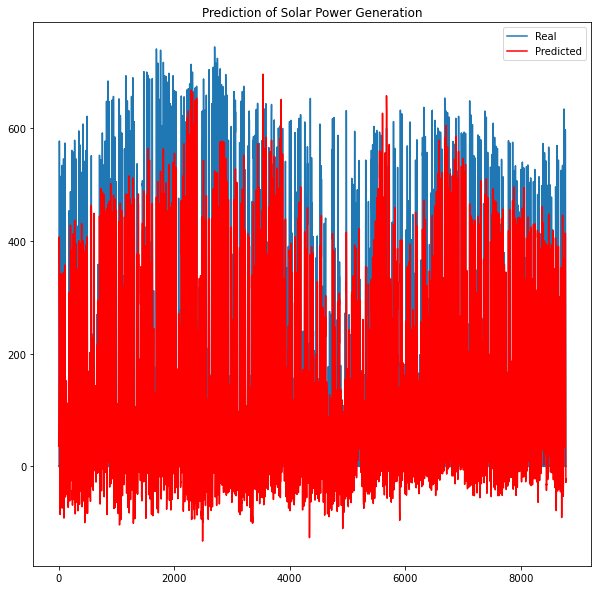

In [100]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 10))
plt.title('Prediction of Solar Power Generation')
plt.plot(y_test, label='Real')
plt.plot(y_pred_lin, color='red', label='Predicted')
plt.legend()
plt.show()

In [108]:
# Cross Validation
# https://www.kaggle.com/code/jnikhilsai/cross-validation-with-linear-regression

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

# 시계열 고려 안한 CV
# R2
scores = cross_val_score(lin_reg, X_train, y_train, scoring='r2', cv=5)
print(scores)

# MSE
scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
print(scores)
print(abs(scores))

[0.80956489 0.85738604 0.60438122 0.82014027 0.79529411]
[ -8325.55332867  -7349.69774682 -14110.1139877   -6194.32002176
  -7341.6106805 ]
[ 8325.55332867  7349.69774682 14110.1139877   6194.32002176
  7341.6106805 ]


In [115]:
# 시계열 데이터 인위적으로 부위 나누기
# Cross-Validation으로

data_2019_2020_x = data.iloc[17520:, 2:22]
data_2019_2020_x = data_2019_2020_x.reset_index(drop=True)
data_2019_2020_y = data.iloc[17520:, 22]
data_2019_2020_y = data_2019_2020_y.reset_index(drop=True)

In [116]:
print(data_2019_2020_x.shape)
print(data_2019_2020_y.shape)

(17544, 20)
(17544,)


In [122]:
cv_1_x = data_2019_2020_x.iloc[:3000]
cv_1_y = data_2019_2020_y.iloc[:3000]

cv_2_x = data_2019_2020_x.iloc[3000:6000]
cv_2_y = data_2019_2020_y.iloc[3000:6000]

cv_3_x = data_2019_2020_x.iloc[6000:9000]
cv_3_y = data_2019_2020_y.iloc[6000:9000]

cv_4_x = data_2019_2020_x.iloc[9000:12000]
cv_4_y = data_2019_2020_y.iloc[9000:12000]

cv_5_x = data_2019_2020_x.iloc[12000:15000]
cv_5_y = data_2019_2020_y.iloc[12000:15000]

cv_6_x = data_2019_2020_x.iloc[15000:]
cv_6_y = data_2019_2020_y.iloc[15000:]


In [123]:
print(cv_1_x.shape)
print(cv_1_y.shape)

print(cv_2_x.shape)
print(cv_2_y.shape)

print(cv_3_x.shape)
print(cv_3_y.shape)

print(cv_4_x.shape)
print(cv_4_y.shape)

print(cv_5_x.shape)
print(cv_5_y.shape)

print(cv_6_x.shape)
print(cv_6_y.shape)

(3000, 20)
(3000,)
(3000, 20)
(3000,)
(3000, 20)
(3000,)
(3000, 20)
(3000,)
(3000, 20)
(3000,)
(2544, 20)
(2544,)


In [ ]:
# cv_1 + cv_2
y_train_pred_cv_1 = lin_reg.predict(cv_1_x)
y_test_pred_cv_1 = lin_reg.predict(X_test)

In [125]:
lin_reg = lin_reg.fit(cv_1_x, cv_1_y)
lin_reg_cv_1 = lin_reg.predict(cv_2_x)

In [126]:
print(lin_reg_cv_1)

[-22.49428891  11.93754278  11.57887144 ...  24.5721889   16.41027674
  11.97782993]
